In [1]:
# Importing packages

import numpy as np
from model import MLP
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from model import onehot


In [2]:
# loading Data
df = load_wine()
X = df["data"]
y = df["target"]

In [3]:
# Preprocssing data
scaler = StandardScaler()
model = scaler.fit(X)
scaled_data = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    y,
                                                    test_size=30,
                                                    train_size=70,
                                                    random_state=18)


# convert X to cpt notation
ones_col = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, ones_col))
ones_col = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, ones_col))

In [4]:

mlp = MLP(input_dim=X_train.shape,
          hidden_dim=50,
          output_dim=3,
          n_classes=3)

losses = []
pre_loss = 1000000
current_loss = 1000
i = 0
epoch = 500
test_accs = []

while i <= epoch and pre_loss - current_loss > 1e-5:
    pre_loss = current_loss
    current_loss = mlp.forward(X_train, y_train)
    mlp.backward()
    mlp.update(learning_rate=1e-1)
    losses.append(current_loss)
    if i % 100 == 0:
        print(f"Epoch {i}, current_loss: {current_loss}")

    y_pred = mlp.predict(X_test)
    # print(y_pred)
    test_acc = accuracy_score(y_pred, y_test)
    # print(f"test acc {test_acc}")
    test_accs.append(test_acc)
    i += 1

(15, 50)
Epoch 0, current_loss: 1.0811103470617331
Epoch 100, current_loss: 0.04557977859296245
Epoch 200, current_loss: 0.01741751346622621
Epoch 300, current_loss: 0.010108845535766438
Epoch 400, current_loss: 0.006906048817293624
Epoch 500, current_loss: 0.005158518362179519
Epoch 600, current_loss: 0.004071768259156679
Epoch 700, current_loss: 0.0033381111883055603
Epoch 800, current_loss: 0.002814294078782916


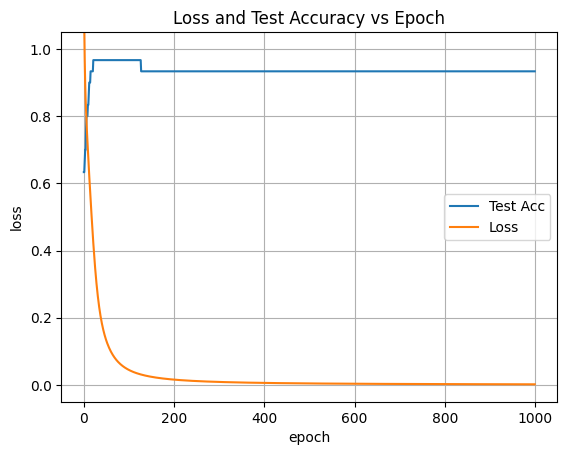

prediction [2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2]
gt [2 0 0 1 0 1 2 1 1 2 1 2 2 2 2 2 2 0 0 1 2 0 0 2 1 2 0 1 2 1 1 0 1 1 1 1 0
 1 0 2 0 2 1 2 1 0 1 1 2 0 1 1 1 0 1 1 1 2 0 0 1 2 1 2 0 1 2 0 0 2]
train acc 1.0
[1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1]
test acc 0.9333333333333333


In [16]:
plt.plot(range(len(losses)), test_accs, label="Test Acc")
plt.plot(range(len(losses)), losses, label="Loss")
plt.title("Loss and Test Accuracy vs Epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim((-0.05, 1.05))
plt.grid()
plt.legend()
plt.show()

y_pred = mlp.predict(X_train)
print(f"prediction {y_pred}")
print(f"gt {y_train}")
print(f"train acc {accuracy_score(y_pred, y_train)}")

y_pred = mlp.predict(X_test)
print(y_pred)
print(f"test acc {accuracy_score(y_pred, y_test)}")
#%%